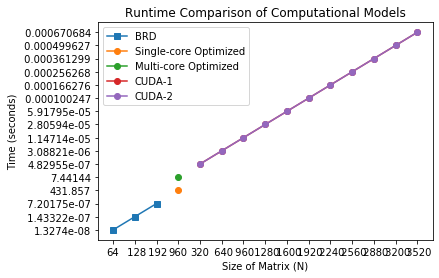

In [5]:
# =========================================
# Simple script to generate plot of results 
# using data from CPU and CUDA Benchmarks
# REQUIRES: csv, matplotlib libraries
# =========================================

import csv
import matplotlib.pyplot as plt

# See README for instructions on generating these data files
# Ensure the 'data' directory is available.
base_fname = "data/base_benchmark.csv"
singlecore_fname = "data/singlecore_benchmark.csv"
multicore_fname = "data/multicore_benchmark.csv"
cuda1_fname = "data/cuda_1_benchmark.csv"
cuda2_fname = "data/cuda_2_benchmark.csv"


# Load CUDA-1 results
with open(cuda1_fname, 'r') as file:
    cuda_results = csv.reader(file)
    x_cuda1 = next(cuda_results)
    y_cuda1 = next(cuda_results)

# Load CUDA-2 results
with open(cuda2_fname, 'r') as file:
    cuda_results = csv.reader(file)
    x_cuda2 = next(cuda_results)
    y_cuda2 = next(cuda_results)

# Load base results
with open(base_fname, 'r') as file:
    base_results = csv.reader(file)
    x_base = next(base_results)
    y_base = next(base_results)

# Load Optimized single-core results
with open(singlecore_fname, 'r') as file:
    single_results = csv.reader(file)
    x_single = next(single_results)
    y_single = next(single_results)

# Load Optimized multi-core results
with open(multicore_fname, 'r') as file:
    multi_results = csv.reader(file)
    x_multi = next(multi_results)
    y_multi = next(multi_results)
        

    
    
# =================================
# Runtime Comparison
# =================================

# plotting the baseline coordinates 
plt.plot(x_base, y_base, label = "BRD", marker='s')
plt.plot(x_single, y_single, label = "Single-core Optimized", marker='o')
plt.plot(x_multi, y_multi, label = "Multi-core Optimized", marker='o')
plt.plot(x_cuda1, y_cuda1, label = "CUDA-1", marker='o')
plt.plot(x_cuda2, y_cuda2, label = "CUDA-2", marker='o')
plt.xlabel('Size of Matrix (N)')
# Set the y axis label of the current axis.
plt.ylabel('Time (seconds)')
# Set a title of the current axes.
plt.title('Runtime Comparison of Computational Models')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()



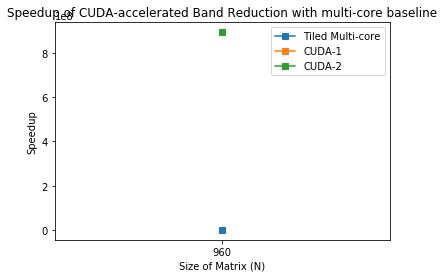

In [6]:
# =================================
# Speedup
# =================================

# calculate speedup ratios
speedup1 = [float(y_single)/float(y_multi[i]) for i, y_single in enumerate(y_single)]
speedup2 = [float(y_single)/float(y_cuda1[i]) for i, y_single in enumerate(y_single)]
speedup3 = [float(y_single)/float(y_cuda2[i]) for i, y_single in enumerate(y_single)]
# plotting the speedup coordinates 
plt.plot(x_single, speedup1, label = "Tiled Multi-core", marker='s')
plt.plot(x_single, speedup2, label = "CUDA-1", marker='s')
plt.plot(x_single, speedup3, label = "CUDA-2", marker='s')
plt.xlabel('Size of Matrix (N)')
# Set the y axis label of the current axis.
plt.ylabel('Speedup')
# Set a title of the current axes.
plt.title('Speedup of CUDA-accelerated Band Reduction with multi-core baseline')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()